# Tema 8: Máquina de Vector de Soporte
## Cuaderno de ejercicios

**Ejercicio 1**

Dado el siguiente conjunto de datos pertenecientes a dos clases:

Clase -1
[[1,9],[5,5],[1,1]]

Clase +1
[[8,5],[13,1],[13,9]]

Dibuje los puntos en un plano e identifique los vectores de soporte y la frontera de decisión para un SVM lineal con un margen máximo para este conjunto de datos. 

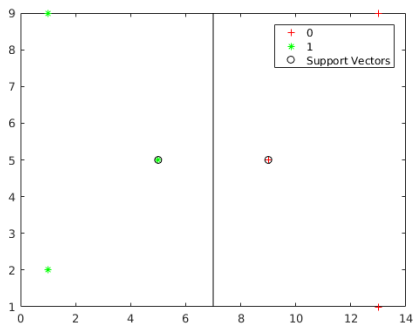



**Ejercicio 2**

Comente como un clasificador SVM puede sobre ajustarse con el conjunto de datos de entrenamiento

**RTA:**
Si no se elige bien el valor de C puede fácilmente sobreajustarse. Si es un valor de C muy grande el margen de error es muy pequeño y difícilmente puede generalizar a datos diferentes a los utilizados durante el entrenamiento. 

**Ejercicio 3**

Aplique SVM al conjunto de datos del load_breast_cancer(). Intente entrenar con varios valores de C con un kernel lineal. ¿Puede un SVM lineal realizar una buena separación del espacio de características? 

In [1]:
import sklearn
from sklearn import svm
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cancer = datasets.load_breast_cancer()
print("Características: ", cancer.feature_names)

Características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# radius (media de las distancias del centro a los puntos del perímetro)
# texture (desviación estándar de los valores de la escala de grises)
# perimeter
# area
# smoothness (variación local en longitudes de radio)
# compactness (perímetro² / área — 1,0)
# concavity (severidad de las porciones cóncavas del contorno)
# concave points (número de porciones cóncavas del contorno)
# symmetry
# fractal dimension (“aproximación de la línea de costa” — 1)

In [4]:
print("Etiquetas: ", cancer.target_names)

Etiquetas:  ['malignant' 'benign']


In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
#cancer.data
df = pd.DataFrame(cancer.data, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'])

In [7]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [9]:
x = df  # Todas las características
y = cancer.target  # Todas las etiquetas

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)

In [10]:
print(x_train[:5], y_train[:5])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
452       12.000         28.23           76.77      442.5          0.08437   
68         9.029         17.33           58.79      250.5          0.10660   
208       13.110         22.54           87.02      529.4          0.10020   
21         9.504         12.44           60.34      273.9          0.10240   
479       16.250         19.51          109.80      815.8          0.10260   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
452           0.06450         0.04055              0.01945         0.1615   
68            0.14130         0.31300              0.04375         0.2111   
208           0.14830         0.08705              0.05102         0.1850   
21            0.06492         0.02956              0.02076         0.1815   
479           0.18930         0.22360              0.09194         0.2151   

     mean fractal dimension  ...  worst radius  worst texture  \
452

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from sklearn.svm import SVC
classifierSVML = SVC(kernel = 'linear', random_state = 0)
classifierSVML.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

num_folds = 10
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor: 0.977436 usando {'C': 0.1, 'kernel': 'linear'}
0.977436 (0.023593) with: {'C': 0.1, 'kernel': 'linear'}
0.831923 (0.041179) with: {'C': 0.1, 'kernel': 'poly'}
0.932436 (0.053627) with: {'C': 0.1, 'kernel': 'rbf'}
0.952436 (0.030470) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.969872 (0.024602) with: {'C': 0.3, 'kernel': 'linear'}
0.872115 (0.047675) with: {'C': 0.3, 'kernel': 'poly'}
0.952436 (0.034328) with: {'C': 0.3, 'kernel': 'rbf'}
0.957436 (0.029649) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.964808 (0.025549) with: {'C': 0.5, 'kernel': 'linear'}
0.884615 (0.037099) with: {'C': 0.5, 'kernel': 'poly'}
0.967436 (0.031707) with: {'C': 0.5, 'kernel': 'rbf'}
0.967436 (0.022479) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.967372 (0.027584) with: {'C': 0.7, 'kernel': 'linear'}
0.889679 (0.040269) with: {'C': 0.7, 'kernel': 'poly'}
0.972500 (0.028395) with: {'C': 0.7, 'kernel': 'rbf'}
0.962308 (0.025904) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.962308 (0.025652) with: {'C': 0.9, 'kernel': 'li

In [14]:
classifierSVML = SVC(C=0.7, kernel = 'linear', random_state = 0)
classifierSVML.fit(x_train, y_train)

SVC(C=0.7, kernel='linear', random_state=0)

In [15]:
Y_pred = classifierSVML.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[ 56,   2],
       [  1, 112]], dtype=int64)